# OUTLIER ANALYSES

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# add grbttools to path
import sys
sys.path.append("../")

In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grbtools import env, disp, gmm, data, outliers, stats, models
import warnings
from grbtools import utils
warnings.filterwarnings("ignore")

## BATSE

### 1. T90

Load BATSE dataset

In [107]:
# load batse dataset
path_batse = os.path.join(env.DIR_DATASETS, "batse.xlsx")
df_batse = pd.read_excel(path_batse, index_col=0)

# select only relevant columns
df_batse = df_batse[['name', 'ee', 'lgT90', 'lgHrd']]

# get t90 feature
df_batse_t90 = df_batse[['lgT90']]

# drop rows with nan values
df_batse_t90 = df_batse_t90.dropna()
# drop inf values
df_batse_t90 = df_batse_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_batse_t90 = df_batse_t90.values.reshape(-1, 1)

# show some rows
df_batse_t90.sample(5)

,lgT90
trigger_num,
5538,1.372028
6355,1.465145
7994,1.417903
2148,1.787999
491,-1.000000


(<Axes: title={'center': 'BATSE T90 Histogram'}, xlabel='lgT90', ylabel='Frequency'>,)

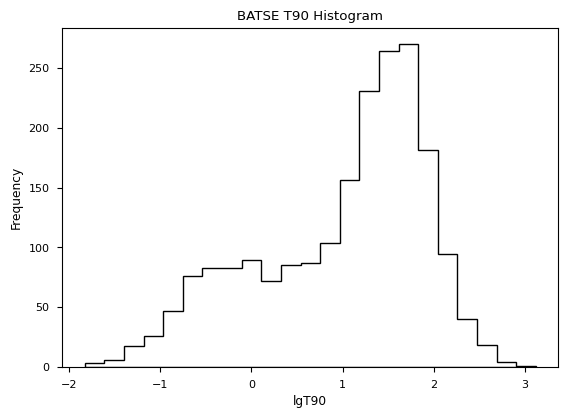

In [108]:
disp.histogram(df_batse_t90, "lgT90", title = "BATSE T90 Histogram")

In [109]:
df_batse_t90['is_outlier'], df_batse_t90['log_dens'] = outliers.outliersKernelDensity1D(X_batse_t90)

n_outliers = df_batse_t90['is_outlier'].sum()
n_inliers = len(X_batse_t90) - n_outliers

print("Number of all GRBs: ", len(X_batse_t90))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_batse['is_outlier_t90'] = df_batse_t90['is_outlier']
df_batse

Number of all GRBs:  2037
Number of outliers:  12
Number of inliers:  2025


,name,ee,lgT90,lgHrd,is_outlier_t90
trigger_num,,,,,
2052,4B 921112-,False,NaN,NaN,NaN
7980,GRB 000203,False,-0.619789,1.111164,False
6405,GRB 970930-,False,1.479201,0.448605,False
3875,4B 951019,False,0.923451,-0.040692,False
6497,GRB 971124,False,0.522183,1.056147,False
...,...,...,...,...,...
3282,4B 941113,False,-1.107905,1.145343,False
3437,4B 950221-,False,-0.463442,1.533466,False
1982,4B 921008,False,2.040697,1.042556,False


Text(0.5, 1.0, 'BATSE T90 Outliers')

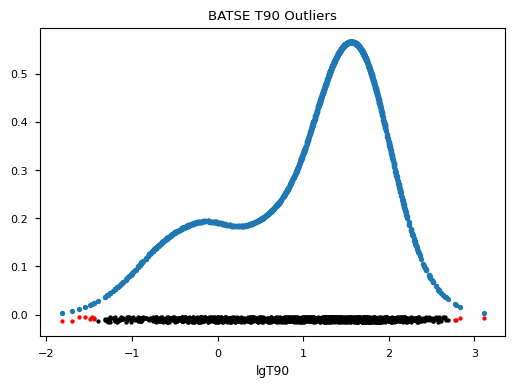

In [110]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_batse_t90[:, 0], 
    np.exp(df_batse_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_batse_t90[~df_batse_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_batse_t90[df_batse_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgT90")
plt.title("BATSE T90 Outliers")

### 2. Spectral Hardness

In [111]:
# get hardness feature
df_batse_hrd = df_batse[['lgHrd']]

# drop rows with nan values
df_batse_hrd = df_batse_hrd.dropna()
# drop inf values
df_batse_hrd = df_batse_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_batse_hrd = df_batse_hrd.values.reshape(-1, 1)

In [112]:
df_batse_hrd['is_outlier'], df_batse_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_batse_hrd)

n_outliers = df_batse_hrd['is_outlier'].sum()
n_inliers = len(X_batse_hrd) - n_outliers

print("Number of all GRBs: ", len(X_batse_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_batse['is_outlier_hrd'] = df_batse_hrd['is_outlier']
df_batse

Number of all GRBs:  2095
Number of outliers:  15
Number of inliers:  2080


,name,ee,lgT90,lgHrd,is_outlier_t90,is_outlier_hrd
trigger_num,,,,,,
2052,4B 921112-,False,NaN,NaN,NaN,NaN
7980,GRB 000203,False,-0.619789,1.111164,False,False
6405,GRB 970930-,False,1.479201,0.448605,False,False
3875,4B 951019,False,0.923451,-0.040692,False,False
6497,GRB 971124,False,0.522183,1.056147,False,False
...,...,...,...,...,...,...
3282,4B 941113,False,-1.107905,1.145343,False,False
3437,4B 950221-,False,-0.463442,1.533466,False,False
1982,4B 921008,False,2.040697,1.042556,False,False


Text(0.5, 1.0, 'BATSE HARDNESS Outliers')

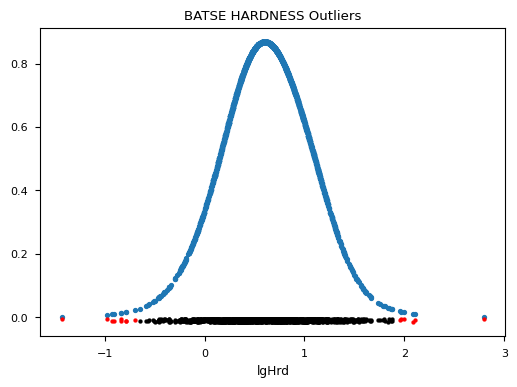

In [114]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_batse_hrd[:, 0], 
    np.exp(df_batse_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_batse_hrd[~df_batse_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_batse_hrd[df_batse_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgHrd")
plt.title("BATSE HARDNESS Outliers")

### 3. T90-Spectral Hardness

In [115]:
# get t90 feature
df_batse_t90_hrd = df_batse[['lgHrd', 'lgT90']]

# drop rows with nan values
df_batse_t90_hrd = df_batse_t90_hrd.dropna()
# drop inf values
df_batse_t90_hrd = df_batse_t90_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_batse_t90_hrd = df_batse_t90_hrd.values
df_batse_t90_hrd.sample(5)

,lgHrd,lgT90
trigger_num,,
3779,0.223705,1.054153
3924,-0.075070,1.019698
1289,0.674347,-0.166853
6498,0.148908,2.035606
6104,-0.238529,1.075693


In [116]:
threshold = 0.01
df_batse_t90_hrd['is_outlier'], df_batse_t90_hrd['log_dens'] = outliers.outliersKernelDensity2D(X_batse_t90_hrd, threshold_density=threshold)

n_outliers = df_batse_t90_hrd['is_outlier'].sum()
n_inliers = len(X_batse_t90_hrd) - n_outliers

print("Number of GRBs: ", len(X_batse_t90_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_batse['is_outlier_t90-hrd'] = df_batse_t90_hrd['is_outlier']
df_batse

Number of GRBs:  1937
Number of outliers:  13
Number of inliers:  1924


,name,ee,lgT90,lgHrd,is_outlier_t90,is_outlier_hrd,is_outlier_t90-hrd
trigger_num,,,,,,,
2052,4B 921112-,False,NaN,NaN,NaN,NaN,NaN
7980,GRB 000203,False,-0.619789,1.111164,False,False,False
6405,GRB 970930-,False,1.479201,0.448605,False,False,False
3875,4B 951019,False,0.923451,-0.040692,False,False,False
6497,GRB 971124,False,0.522183,1.056147,False,False,False
...,...,...,...,...,...,...,...
3282,4B 941113,False,-1.107905,1.145343,False,False,False
3437,4B 950221-,False,-0.463442,1.533466,False,False,False
1982,4B 921008,False,2.040697,1.042556,False,False,False


Text(0.5, 1.0, 'BATSE T90-HRD Outliers | Threshold: 0.01')

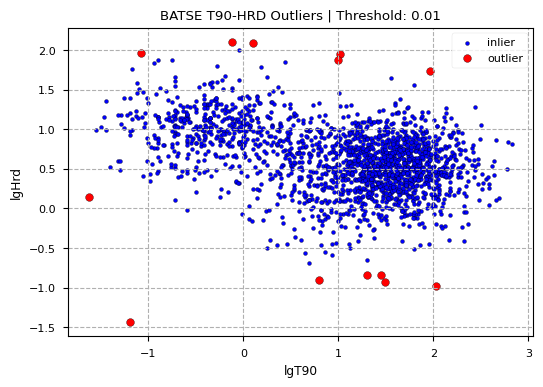

In [119]:
plt.figure(figsize=(6,4))
df_batse_outlier = df_batse_t90_hrd[df_batse_t90_hrd['is_outlier'] == True]
df_batse_inlier = df_batse_t90_hrd[df_batse_t90_hrd['is_outlier'] == False]

plt.scatter(df_batse_inlier.loc[:, 'lgT90'], df_batse_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_batse_outlier.loc[:, 'lgT90'], df_batse_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgT90")
plt.ylabel("lgHrd")
plt.grid(linestyle="--")
plt.title("BATSE T90-HRD Outliers | Threshold: " + str(threshold))

-----

## FERMI

### 1. T90

Load FERMI dataset

In [120]:
# load fermi dataset
path_fermi = os.path.join(env.DIR_DATASETS, "fermi.xlsx")
df_fermi = pd.read_excel(path_fermi, index_col=0)

# select only relevant columns
df_fermi = df_fermi[['name', 'ee', 'lgT90', 'lgHrd']]

# get t90 feature
df_fermi_t90 = df_fermi[['lgT90']]

# drop rows with nan values
df_fermi_t90 = df_fermi_t90.dropna()
# drop inf values
df_fermi_t90 = df_fermi_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_fermi_t90 = df_fermi_t90.values.reshape(-1, 1)

# show some rows
df_fermi_t90.sample(5)

,lgT90
1561,1.606908
1122,-0.017729
3447,1.164115
3358,2.161056
3500,1.844409


(<Axes: title={'center': 'FERMI T90 Histogram'}, xlabel='lgT90', ylabel='Frequency'>,)

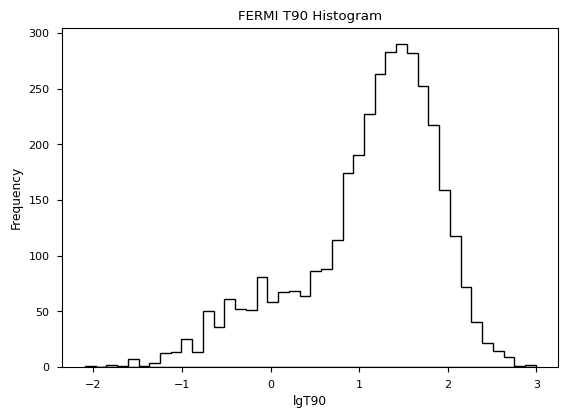

In [121]:
disp.histogram(df_fermi_t90, "lgT90", title = "FERMI T90 Histogram")

In [122]:
df_fermi_t90['is_outlier'], df_fermi_t90['log_dens'] = outliers.outliersKernelDensity1D(X_fermi_t90)

n_outliers = df_fermi_t90['is_outlier'].sum()
n_inliers = len(X_fermi_t90) - n_outliers

print("Number of all GRBs: ", len(X_fermi_t90))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_fermi['is_outlier_t90'] = df_fermi_t90['is_outlier']
df_fermi

Number of all GRBs:  3568
Number of outliers:  32
Number of inliers:  3536


,name,ee,lgT90,lgHrd,is_outlier_t90
0,GRB120403857,False,0.632255,0.531720,False
1,GRB120227725,False,1.240749,0.486977,False
2,GRB230524357,False,1.041708,NaN,False
3,GRB210411564,False,1.680091,NaN,False
4,GRB190304818,False,0.459392,NaN,False
...,...,...,...,...,...
3564,GRB210624041,False,-0.517126,NaN,False
3565,GRB091012783,False,-0.152427,1.130122,False
3566,GRB130528695,False,1.744708,0.353489,False
3567,GRB090813174,False,0.878062,0.310897,False


Text(0.5, 1.0, 'FERMI T90 Outliers')

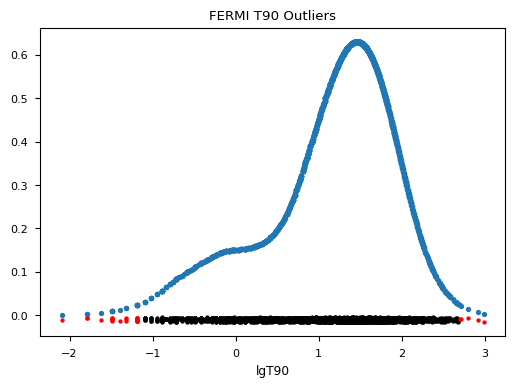

In [125]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_fermi_t90[:, 0], 
    np.exp(df_fermi_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_fermi_t90[~df_fermi_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_fermi_t90[df_fermi_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgT90")
plt.title("FERMI T90 Outliers")

### 2. Spectral Hardness

In [126]:
# get hardness feature
df_fermi_hrd = df_fermi[['lgHrd']]

# drop rows with nan values
df_fermi_hrd = df_fermi_hrd.dropna()
# drop inf values
df_fermi_hrd = df_fermi_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_fermi_hrd = df_fermi_hrd.values.reshape(-1, 1)

In [127]:
df_fermi_hrd['is_outlier'], df_fermi_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_fermi_hrd)

n_outliers = df_fermi_hrd['is_outlier'].sum()
n_inliers = len(X_fermi_hrd) - n_outliers

print("Number of all GRBs: ", len(X_fermi_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

df_fermi['is_outlier_hrd'] = df_fermi_hrd['is_outlier']
df_fermi

Number of all GRBs:  2311
Number of outliers:  30
Number of inliers:  2281


,name,ee,lgT90,lgHrd,is_outlier_t90,is_outlier_hrd
0,GRB120403857,False,0.632255,0.531720,False,False
1,GRB120227725,False,1.240749,0.486977,False,False
2,GRB230524357,False,1.041708,NaN,False,NaN
3,GRB210411564,False,1.680091,NaN,False,NaN
4,GRB190304818,False,0.459392,NaN,False,NaN
...,...,...,...,...,...,...
3564,GRB210624041,False,-0.517126,NaN,False,NaN
3565,GRB091012783,False,-0.152427,1.130122,False,False
3566,GRB130528695,False,1.744708,0.353489,False,False
3567,GRB090813174,False,0.878062,0.310897,False,False


Text(0.5, 0, 'lgHrd')

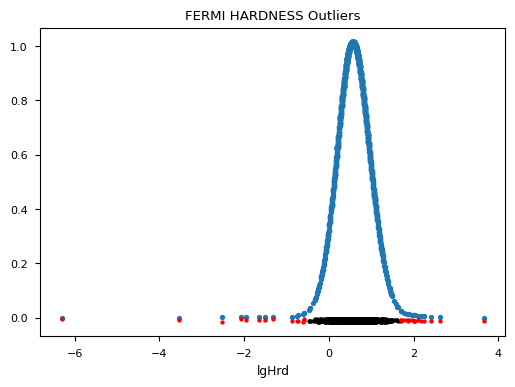

In [130]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_fermi_hrd[:, 0], 
    np.exp(df_fermi_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_fermi_hrd[~df_fermi_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_fermi_hrd[df_fermi_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("FERMI HARDNESS Outliers")
plt.xlabel("lgHrd")

### 3. T90-Spectral Hardness

In [131]:
# get t90-hardness feature
df_fermi_t90_hrd = df_fermi[['lgHrd', 'lgT90']]

# drop rows with nan values
df_fermi_t90_hrd = df_fermi_t90_hrd.dropna()
# drop inf values
df_fermi_t90_hrd = df_fermi_t90_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_fermi_t90_hrd = df_fermi_t90_hrd.values
df_fermi_t90_hrd.sample(5)

,lgHrd,lgT90
2636,0.937544,-0.079877
3211,0.446370,1.132516
2027,1.064198,-0.290730
1703,-0.046632,0.686994
1305,0.709134,1.115810


In [132]:
threshold = 0.01
df_fermi_t90_hrd['is_outlier'], df_fermi_t90_hrd['log_dens'] = outliers.outliersKernelDensity2D(X_fermi_t90_hrd, threshold_density=threshold)

n_outliers = df_fermi_t90_hrd['is_outlier'].sum()
n_inliers = len(X_fermi_t90_hrd) - n_outliers

print("Number of GRBs: ", len(X_fermi_t90_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_fermi['is_outlier_t90-hrd'] = df_fermi_t90_hrd['is_outlier']
df_fermi

Number of GRBs:  2310
Number of outliers:  31
Number of inliers:  2279


,name,ee,lgT90,lgHrd,is_outlier_t90,is_outlier_hrd,is_outlier_t90-hrd
0,GRB120403857,False,0.632255,0.531720,False,False,False
1,GRB120227725,False,1.240749,0.486977,False,False,False
2,GRB230524357,False,1.041708,NaN,False,NaN,NaN
3,GRB210411564,False,1.680091,NaN,False,NaN,NaN
4,GRB190304818,False,0.459392,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...
3564,GRB210624041,False,-0.517126,NaN,False,NaN,NaN
3565,GRB091012783,False,-0.152427,1.130122,False,False,False
3566,GRB130528695,False,1.744708,0.353489,False,False,False
3567,GRB090813174,False,0.878062,0.310897,False,False,False


Text(0.5, 1.0, 'FERMI T90-HRD Outliers | Threshold: 0.01')

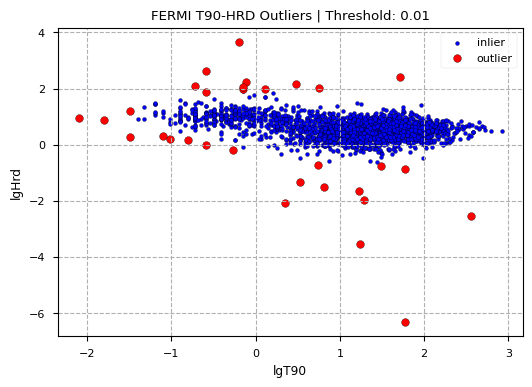

In [133]:
plt.figure(figsize=(6,4))
df_fermi_outlier = df_fermi_t90_hrd[df_fermi_t90_hrd['is_outlier'] == True]
df_fermi_inlier = df_fermi_t90_hrd[df_fermi_t90_hrd['is_outlier'] == False]

plt.scatter(df_fermi_inlier.loc[:, 'lgT90'], df_fermi_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_fermi_outlier.loc[:, 'lgT90'], df_fermi_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgT90")
plt.ylabel("lgHrd")
plt.grid(linestyle="--")
plt.title("FERMI T90-HRD Outliers | Threshold: " + str(threshold))

------

## SWIFT

### 1. T90

Load Swift dataset

In [134]:
# load swift dataset
path_swift = os.path.join(env.DIR_DATASETS, "swift.xlsx")
df_swift = pd.read_excel(path_swift, index_col=0)

# select only relevant columns
df_swift = df_swift[['name', 'ee', 'lgT90', 'lgHrd', 'lgT90i', 'lgLum']]

In [135]:
# get t90 feature
df_swift_t90 = df_swift[['lgT90']]

# drop rows with nan values
df_swift_t90 = df_swift_t90.dropna()
# drop inf values
df_swift_t90 = df_swift_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90 = df_swift_t90.values.reshape(-1, 1)

# show some rows
df_swift_t90.sample(5)

,lgT90
68,1.846387
273,1.806180
1380,1.839629
448,0.455150
1071,1.892451


(<Axes: title={'center': 'SWIFT T90 Histogram'}, xlabel='lgT90', ylabel='Frequency'>,)

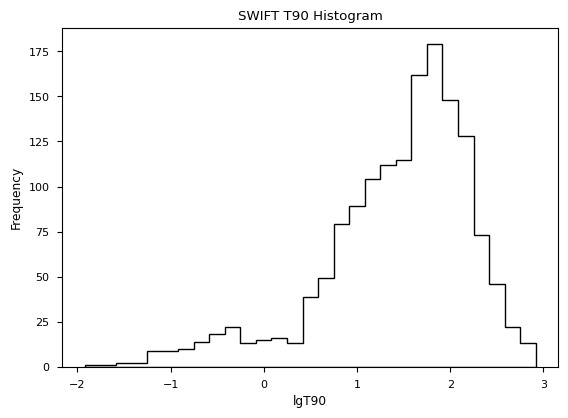

In [136]:
disp.histogram(df_swift_t90, "lgT90", title = "SWIFT T90 Histogram")

In [137]:
df_swift_t90['is_outlier'], df_swift_t90['log_dens'] = outliers.outliersKernelDensity1D(X_swift_t90)

n_outliers = df_swift_t90['is_outlier'].sum()
n_inliers = len(X_swift_t90) - n_outliers

print("Number of all GRBs: ", len(X_swift_t90))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_t90'] = df_swift_t90['is_outlier']
df_swift

Number of all GRBs:  1503
Number of outliers:  9
Number of inliers:  1494


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False
...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT T90 Outliers')

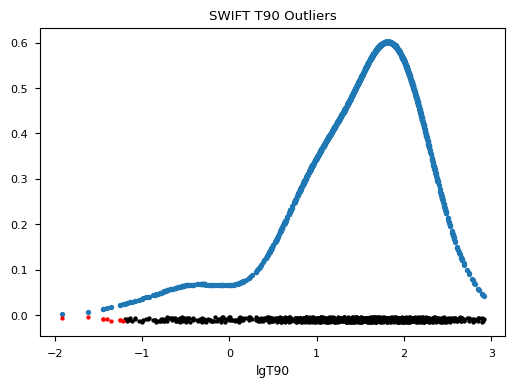

In [138]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_swift_t90[:, 0], 
    np.exp(df_swift_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_swift_t90[~df_swift_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_swift_t90[df_swift_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgT90")
plt.title("SWIFT T90 Outliers")

### 2. Spectral Hardness

In [139]:
# get hardness feature
df_swift_hrd = df_swift[['lgHrd']]

# drop rows with nan values
df_swift_hrd = df_swift_hrd.dropna()
# drop inf values
df_swift_hrd = df_swift_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_hrd = df_swift_hrd.values.reshape(-1, 1)

In [140]:
df_swift_hrd['is_outlier'], df_swift_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_swift_hrd)

n_outliers = df_swift_hrd['is_outlier'].sum()
n_inliers = len(X_swift_hrd) - n_outliers

print("Number of all GRBs: ", len(X_swift_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

df_swift['is_outlier_hrd'] = df_swift_hrd['is_outlier']
df_swift

Number of all GRBs:  1490
Number of outliers:  3
Number of inliers:  1487


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'lgHrd')

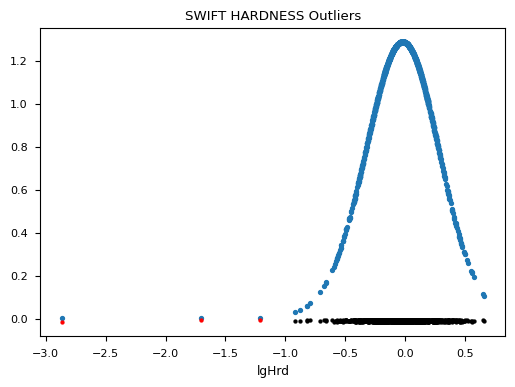

In [142]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_swift_hrd[:, 0], 
    np.exp(df_swift_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_swift_hrd[~df_swift_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_swift_hrd[df_swift_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("SWIFT HARDNESS Outliers")
plt.xlabel("lgHrd")

### 3. T90i

In [143]:
# get intrinsic t90 feature
df_swift_t90i = df_swift[['lgT90i']]

# drop rows with nan values
df_swift_t90i = df_swift_t90i.dropna()
# drop inf values
df_swift_t90i = df_swift_t90i.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90i = df_swift_t90i.values.reshape(-1, 1)

In [144]:
df_swift_t90i['is_outlier'], df_swift_t90i['log_dens'] = outliers.outliersKernelDensity1D(X_swift_t90i)

n_outliers = df_swift_t90i['is_outlier'].sum()
n_inliers = len(X_swift_t90i) - n_outliers

print("Number of all GRBs: ", len(X_swift_t90i))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

df_swift['is_outlier_t90i'] = df_swift_t90i['is_outlier']
df_swift

Number of all GRBs:  484
Number of outliers:  4
Number of inliers:  480


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT T90i Outliers')

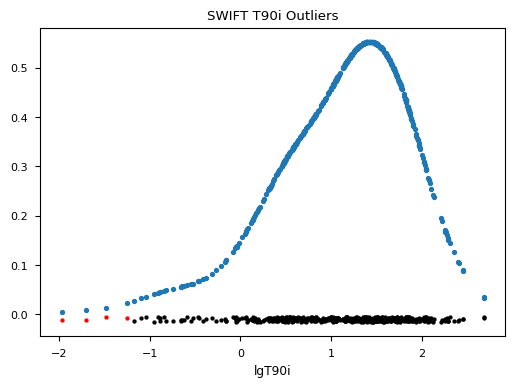

In [145]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_swift_t90i[:, 0], 
    np.exp(df_swift_t90i['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_swift_t90i[~df_swift_t90i['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_swift_t90i[df_swift_t90i['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgT90i")
plt.title("SWIFT T90i Outliers")

### 4. Luminosity

In [146]:
# get luminosity feature
df_swift_lum = df_swift[['lgLum']]

# drop rows with nan values
df_swift_lum = df_swift_lum.dropna()
# drop inf values
df_swift_lum = df_swift_lum.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_lum = df_swift_lum.values.reshape(-1, 1)

In [147]:
df_swift_lum['is_outlier'], df_swift_lum['log_dens'] = outliers.outliersKernelDensity1D(X_swift_lum)

n_outliers = df_swift_lum['is_outlier'].sum()
n_inliers = len(X_swift_lum) - n_outliers

print("Number of all GRBs: ", len(X_swift_lum))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

df_swift['is_outlier_lum'] = df_swift_lum['is_outlier']
df_swift

Number of all GRBs:  473
Number of outliers:  10
Number of inliers:  463


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT LUMINOSITY Outliers')

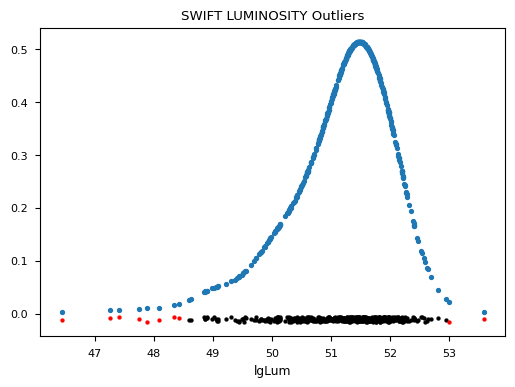

In [149]:
plt.figure(figsize=(6,4))
plt.scatter(
    X_swift_lum[:, 0], 
    np.exp(df_swift_lum['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_swift_lum[~df_swift_lum['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_swift_lum[df_swift_lum['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.xlabel("lgLum")
plt.title("SWIFT LUMINOSITY Outliers")

### 5. T90-Spectral Hardness

In [150]:
# get t90-hardness feature
df_swift_t90_hrd = df_swift[['lgHrd', 'lgT90']]

# drop rows with nan values
df_swift_t90_hrd = df_swift_t90_hrd.dropna()
# drop inf values
df_swift_t90_hrd = df_swift_t90_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90_hrd = df_swift_t90_hrd.values
df_swift_t90_hrd.sample(5)

,lgHrd,lgT90
448,-0.15121,0.455150
1023,-0.42740,2.717571
1442,-0.41511,0.602060
1283,-0.17120,1.591955
1435,0.16839,0.301030


In [151]:
threshold = 0.01
df_swift_t90_hrd['is_outlier'], df_swift_t90_hrd['log_dens'] = outliers.outliersKernelDensity2D(X_swift_t90_hrd, threshold_density=threshold)

n_outliers = df_swift_t90_hrd['is_outlier'].sum()
n_inliers = len(X_swift_t90_hrd) - n_outliers

print("Number of GRBs: ", len(X_swift_t90_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_t90-hrd'] = df_swift_t90_hrd['is_outlier']
df_swift

Number of GRBs:  1477
Number of outliers:  7
Number of inliers:  1470


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum,is_outlier_t90-hrd
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN,False
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN,False
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN,False
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN,False
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN,False
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN,False
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN,False
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT T90-HRD Outliers | Threshold: 0.01')

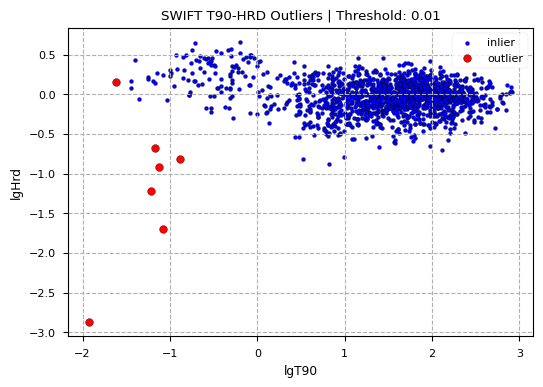

In [153]:
plt.figure(figsize=(6,4))
df_swift_outlier = df_swift_t90_hrd[df_swift_t90_hrd['is_outlier'] == True]
df_swift_inlier = df_swift_t90_hrd[df_swift_t90_hrd['is_outlier'] == False]

plt.scatter(df_swift_inlier.loc[:, 'lgT90'], df_swift_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_swift_outlier.loc[:, 'lgT90'], df_swift_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgT90")
plt.ylabel("lgHrd")
plt.grid(linestyle="--")
plt.title("SWIFT T90-HRD Outliers | Threshold: " + str(threshold))

### 6. T90i-Spectral Hardness

In [154]:
# get t90i-hardness feature
df_swift_t90i_hrd = df_swift[['lgHrd', 'lgT90i']]

# drop rows with nan values
df_swift_t90i_hrd = df_swift_t90i_hrd.dropna()
# drop inf values
df_swift_t90i_hrd = df_swift_t90i_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90i_hrd = df_swift_t90i_hrd.values
df_swift_t90i_hrd.sample(5)

,lgHrd,lgT90i
27,-0.15548,0.928488
1333,0.17872,1.386971
1342,0.29033,1.524771
1384,-0.10645,1.645991
404,-0.05399,0.910046


In [155]:
threshold = 0.01
df_swift_t90i_hrd['is_outlier'], df_swift_t90i_hrd['log_dens'] = outliers.outliersKernelDensity2D(X_swift_t90i_hrd, threshold_density=threshold)

n_outliers = df_swift_t90i_hrd['is_outlier'].sum()
n_inliers = len(X_swift_t90i_hrd) - n_outliers

print("Number of GRBs: ", len(X_swift_t90i_hrd))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_t90i-hrd'] = df_swift_t90i_hrd['is_outlier']
df_swift

Number of GRBs:  478
Number of outliers:  3
Number of inliers:  475


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum,is_outlier_t90-hrd,is_outlier_t90i-hrd
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN,False,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN,False,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN,False,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN,False,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN,False,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN,False,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN,False,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT T90i-HRD Outliers | Threshold: 0.01')

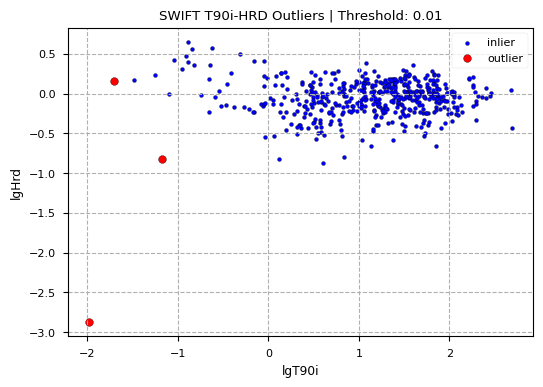

In [156]:
plt.figure(figsize=(6,4))
df_swift_outlier = df_swift_t90i_hrd[df_swift_t90i_hrd['is_outlier'] == True]
df_swift_inlier = df_swift_t90i_hrd[df_swift_t90i_hrd['is_outlier'] == False]

plt.scatter(df_swift_inlier.loc[:, 'lgT90i'], df_swift_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_swift_outlier.loc[:, 'lgT90i'], df_swift_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgT90i")
plt.ylabel("lgHrd")
plt.grid(linestyle="--")
plt.title("SWIFT T90i-HRD Outliers | Threshold: " + str(threshold))

### 7. T90i - Luminosity

In [157]:
# get t90-hardness feature
df_swift_t90i_lum = df_swift[['lgLum', 'lgT90i']]

# drop rows with nan values
df_swift_t90i_lum = df_swift_t90i_lum.dropna()
# drop inf values
df_swift_t90i_lum = df_swift_t90i_lum.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90i_lum = df_swift_t90i_lum.values
df_swift_t90i_lum.sample(5)

,lgLum,lgT90i
458,49.447468,-0.887840
1469,51.341665,1.005636
1439,51.831848,1.046017
776,50.358563,1.617710
822,50.868600,1.068457


In [158]:
threshold = 0.01
df_swift_t90i_lum['is_outlier'], df_swift_t90i_lum['log_dens'] = outliers.outliersKernelDensity2D(X_swift_t90i_lum, threshold_density=threshold)

n_outliers = df_swift_t90i_lum['is_outlier'].sum()
n_inliers = len(X_swift_t90i_lum) - n_outliers

print("Number of GRBs: ", len(df_swift_t90i_lum))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_t90i-lum'] = df_swift_t90i_lum['is_outlier']
df_swift

Number of GRBs:  473
Number of outliers:  15
Number of inliers:  458


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum,is_outlier_t90-hrd,is_outlier_t90i-hrd,is_outlier_t90i-lum
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT T90i-LUM Outliers | Threshold: 0.01')

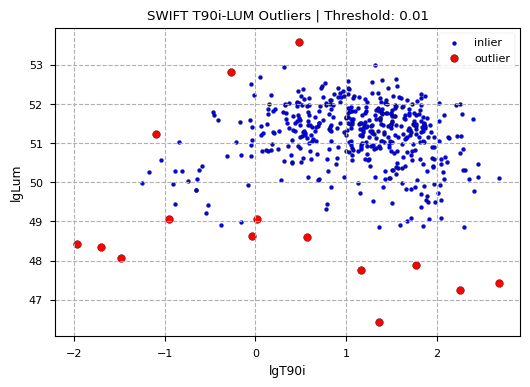

In [159]:
plt.figure(figsize=(6,4))
df_swift_outlier = df_swift_t90i_lum[df_swift_t90i_lum['is_outlier'] == True]
df_swift_inlier = df_swift_t90i_lum[df_swift_t90i_lum['is_outlier'] == False]

plt.scatter(df_swift_inlier.loc[:, 'lgT90i'], df_swift_inlier.loc[:, 'lgLum'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_swift_outlier.loc[:, 'lgT90i'], df_swift_outlier.loc[:, 'lgLum'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgT90i")
plt.ylabel("lgLum")
plt.grid(linestyle="--")
plt.title("SWIFT T90i-LUM Outliers | Threshold: " + str(threshold))

### 8. Spectral Hardness - Luminosity

In [160]:
# get hardness-luminosity feature
df_swift_hrd_lum = df_swift[['lgHrd', 'lgLum']]

# drop rows with nan values
df_swift_hrd_lum = df_swift_hrd_lum.dropna()
# drop inf values
df_swift_hrd_lum = df_swift_hrd_lum.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_hrd_lum = df_swift_hrd_lum.values
df_swift_hrd_lum.sample(5)

,lgHrd,lgLum
1378,0.18509,49.988131
1287,-0.03934,50.085704
1463,0.17361,51.566343
384,-0.20491,50.081344
851,-0.22511,51.782919


In [161]:
threshold = 0.01
df_swift_hrd_lum['is_outlier'], df_swift_hrd_lum['log_dens'] = outliers.outliersKernelDensity2D(X_swift_hrd_lum, threshold_density=threshold)

n_outliers = df_swift_hrd_lum['is_outlier'].sum()
n_inliers = len(X_swift_hrd_lum) - n_outliers

print("Number of GRBs: ", len(X_swift_hrd_lum))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_hrd-lum'] = df_swift_hrd_lum['is_outlier']
df_swift

Number of GRBs:  473
Number of outliers:  7
Number of inliers:  466


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum,is_outlier_t90-hrd,is_outlier_t90i-hrd,is_outlier_t90i-lum,is_outlier_hrd-lum
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SWIFT HRD-LUM Outliers | Threshold: 0.01')

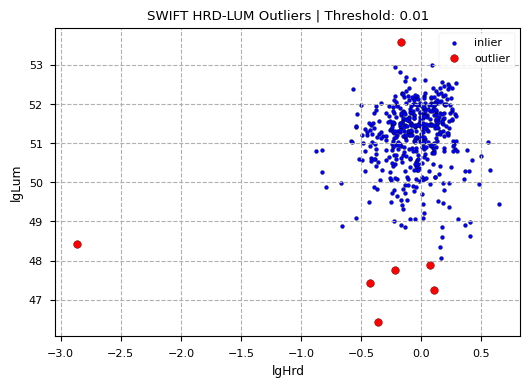

In [162]:
plt.figure(figsize=(6,4))
df_swift_outlier = df_swift_hrd_lum[df_swift_hrd_lum['is_outlier'] == True]
df_swift_inlier = df_swift_hrd_lum[df_swift_hrd_lum['is_outlier'] == False]

plt.scatter(df_swift_inlier.loc[:, 'lgHrd'], df_swift_inlier.loc[:, 'lgLum'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_swift_outlier.loc[:, 'lgHrd'], df_swift_outlier.loc[:, 'lgLum'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.xlabel("lgHrd")
plt.ylabel("lgLum")
plt.grid(linestyle="--")
plt.title("SWIFT HRD-LUM Outliers | Threshold: " + str(threshold))

### 9. T90i-Hrd-Lum

In [163]:
# get t90i-hardness-luminosity feature
df_swift_t90i_hrd_lum = df_swift[['lgHrd', 'lgLum', 'lgT90i']]

# drop rows with nan values
df_swift_t90i_hrd_lum = df_swift_t90i_hrd_lum.dropna()
# drop inf values
df_swift_t90i_hrd_lum = df_swift_t90i_hrd_lum.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_swift_t90i_hrd_lum = df_swift_t90i_hrd_lum.values
df_swift_t90i_hrd_lum.sample(5)

,lgHrd,lgLum,lgT90i
867,0.08175,50.929187,1.276867
358,-0.20622,50.956962,1.167314
1252,0.25766,51.871831,0.135682
1379,-0.21174,51.679626,1.848828
740,0.15670,51.298405,1.188497


In [164]:
threshold = 0.01
df_swift_t90i_hrd_lum['is_outlier'], df_swift_t90i_hrd_lum['log_dens'] = outliers.outliersKernelDensity3D(X_swift_t90i_hrd_lum, threshold_density=threshold)

n_outliers = df_swift_t90i_hrd_lum['is_outlier'].sum()
n_inliers = len(X_swift_t90i_hrd_lum) - n_outliers

print("Number of GRBs: ", len(df_swift_t90i_hrd_lum))
print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

# Save the output
df_swift['is_outlier_t90i-hrd-lum'] = df_swift_t90i_hrd_lum['is_outlier']
df_swift

Number of GRBs:  473
Number of outliers:  28
Number of inliers:  445


,name,ee,lgT90,lgHrd,lgT90i,lgLum,is_outlier_t90,is_outlier_hrd,is_outlier_t90i,is_outlier_lum,is_outlier_t90-hrd,is_outlier_t90i-hrd,is_outlier_t90i-lum,is_outlier_hrd-lum,is_outlier_t90i-hrd-lum
0,GRB220715B,False,1.606467,0.11141,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
1,GRB220714B,False,1.690550,-0.18394,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
2,GRB220711B,False,1.939799,-0.09166,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
3,GRB220708A,False,0.602060,-0.35509,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
4,GRB220706A,False,1.934478,-0.10224,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,GRB041220,False,0.746945,-0.05637,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
1521,GRB041219C,False,1.000000,-0.23642,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
1522,GRB041219B,False,0.993701,-0.24785,NaN,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
1523,GRB041219A,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


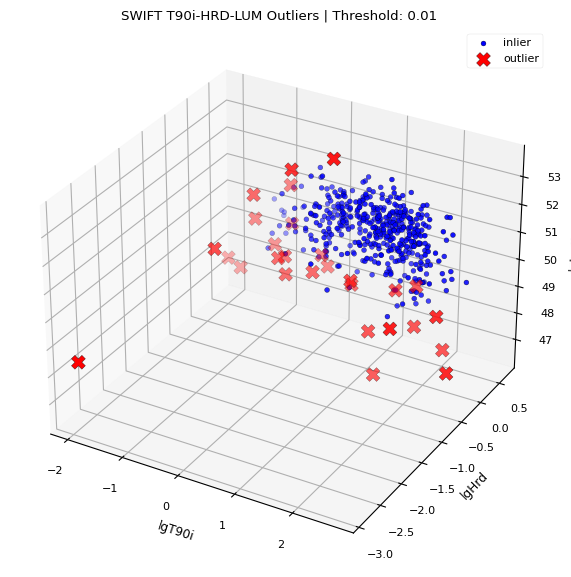

In [167]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
df_swift_outlier = df_swift_t90i_hrd_lum[df_swift_t90i_hrd_lum['is_outlier'] == True]
df_swift_inlier = df_swift_t90i_hrd_lum[df_swift_t90i_hrd_lum['is_outlier'] == False]


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_swift_inlier.loc[:, 'lgT90i'], df_swift_inlier.loc[:, 'lgHrd'], df_swift_inlier.loc[:, 'lgLum'], color="blue", marker=".", edgecolors="black", label="inlier", s=50)
ax.scatter3D(df_swift_outlier.loc[:, 'lgT90i'], df_swift_outlier.loc[:, 'lgHrd'], df_swift_outlier.loc[:, 'lgLum'], color="red", marker="X", edgecolors="black", label="outlier", s=100)

plt.legend()
plt.title("SWIFT T90i-HRD-LUM Outliers | Threshold: " + str(threshold))
ax.set_xlabel("lgT90i")
ax.set_ylabel("lgHrd")
ax.set_zlabel("lgLum")
# show plot
plt.show()